In [3]:
import tensorflow as tf
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 132s 1us/step


In [14]:

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

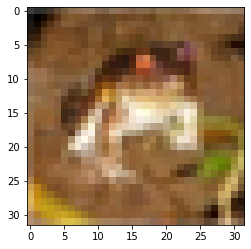

In [17]:
plt.imshow(x_train[0])

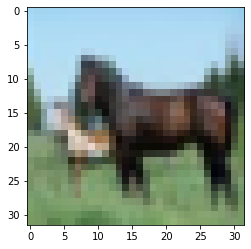

In [18]:
plt.imshow(x_train[12])

In [21]:
x_train[0].max()

255

In [23]:

x_train = x_train/255

In [24]:
x_test = x_test/255

In [27]:
y_cat_train = to_categorical(y_train,10) # 10 categories

In [35]:
y_cat_test = to_categorical(y_test,10)

In [36]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [37]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5268 - accuracy: 0.4526
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1826 - accuracy: 0.5845
Epoch 3/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0426 - accuracy: 0.6371
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9380 - accuracy: 0.6765
Epoch 5/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8595 - accuracy: 0.7042
Epoch 6/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8033 - accuracy: 0.7255
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7572 - accuracy: 0.7429
Epoch 8/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7188 - accuracy: 0.7549
Epoch 9/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6877 - accuracy: 0.7685
Epoch 10/20
1563/1563 [==============================] - 35s 22m